# Assignment 2

## Abstract

In the following assignment, California Housing Data is being used. Here, the dependent variable (target variable) is the median_house_value. 

Importing libraries

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.interpolate import *
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from sklearn.cross_validation import train_test_split
%matplotlib inline

In [171]:
df = pd.read_csv("housing.csv")

In [172]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [173]:
median_hma = df.housing_median_age.median()
print(median_hma)

29.0


In [174]:
df['house_age'] = np.where(df.housing_median_age < median_hma, 'NEW', 'OLD')

In [175]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,NEW
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,OLD
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,OLD
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,OLD


In [176]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
house_age             20640 non-null object
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


In [178]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

total_bedrooms    207
dtype: int64

In [179]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
house_age               0
dtype: int64

## Data Cleaning 
As we can see, the data has 207 missing values for the total_bedrooms column. For more accurate prediction, we will clean this data by filling up the missing values with the median of total_bedrooms. 

In [180]:
median_total_bedrooms = df['total_bedrooms'].median()
print(median_total_bedrooms)

435.0


In [181]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_total_bedrooms)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
house_age             0
dtype: int64

In [182]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


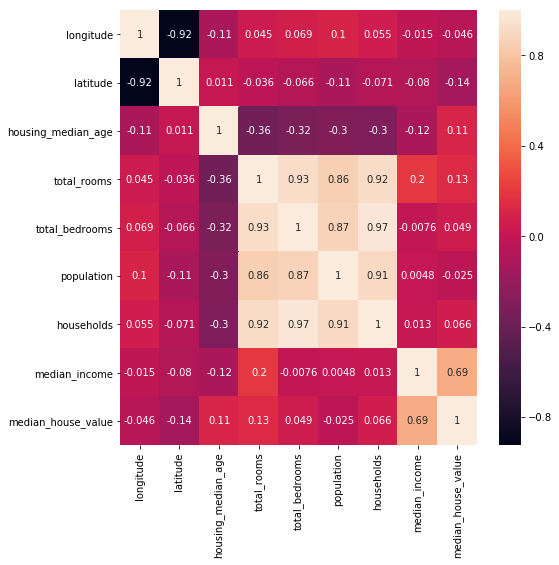

In [183]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Checking if a Linear relationship exists between the independent and dependent variable

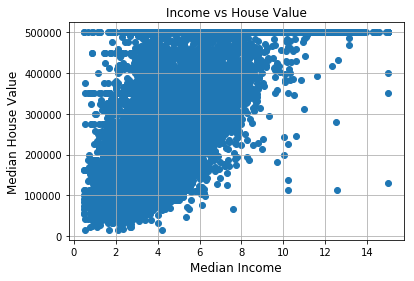

In [184]:

plt.scatter(df['median_income'], df['median_house_value'])
plt.title('Income vs House Value', fontsize = 12)
plt.xlabel('Median Income', fontsize = 12)
plt.ylabel('Median House Value', fontsize = 12)
plt.grid(True)
plt.show()

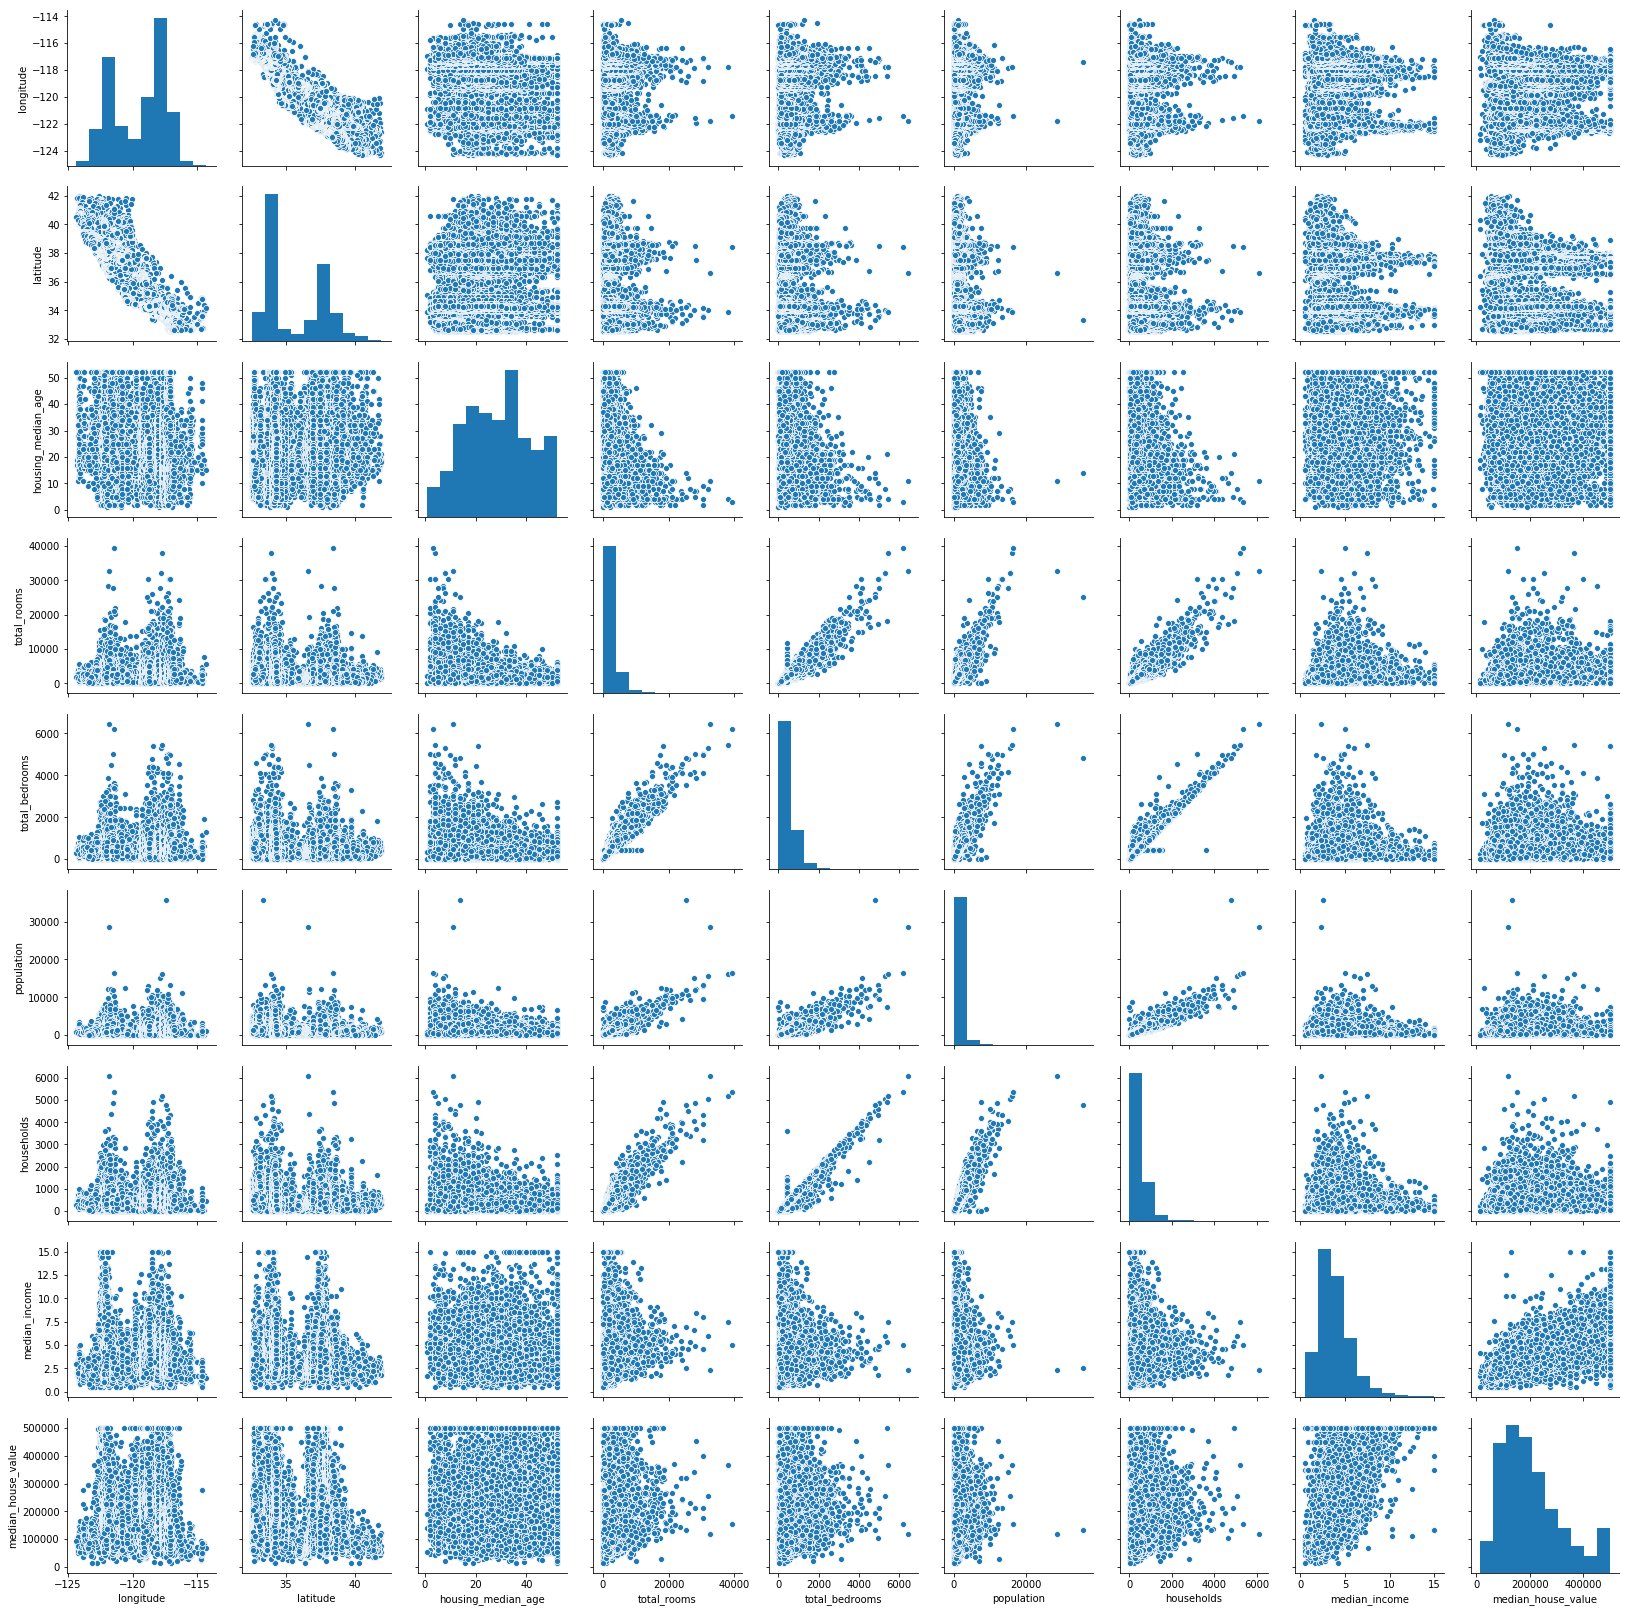

In [185]:
sns.pairplot(df)

## Part 1 - Generating Linear Models 

### Linear Regression Model with one Independent Variable 

In [186]:
X = df['median_income']
y = df['median_house_value']
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.357e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:22:29   Log-Likelihood:            -2.6381e+05
No. Observations:               20640   AIC:                         5.276e+05
Df Residuals:                   20639   BIC:                         5.276e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
median_income  5.118e+04    138.928    368.395      0.000    5.09e+04    5.15e+04
==============================================================================
Omnibus:                     3633.023   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9249.629
Skew:                           0.974   Prob(JB):                         0.00
Kurtosis:                       5.638   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Below, we are plotting a regplot to see the regression line and the confidence interval. In this dataset, while the noise is high around the median values of x, the spread of values on the X-axis is low. Due to this the confidence interval is not well observed. 

C:\Users\Varada\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


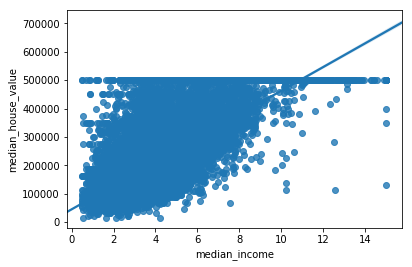

In [187]:
sns.regplot(x='median_income', y='median_house_value' , data = df)

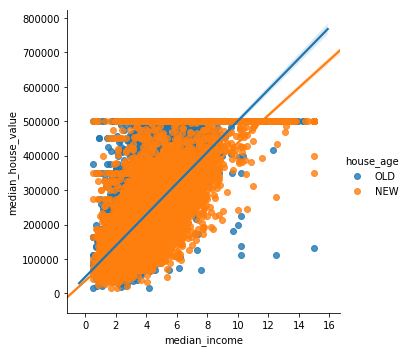

In [188]:
sns.lmplot(x = 'median_income', y = 'median_house_value', hue = 'house_age', data = df)

### Multiple Regression with 2 independent Variables

Below, we will be plotting multiple regression for 2 variables - housing_median_age and median_income.
The formula for multiple regression is being used with the Ordinary Least Squares method. 

#### Splitting the data into training and testing sets. 

In [189]:
X = df[['median_income', 'housing_median_age']]
y = df[['median_house_value']]

#Split the dataframe into training and testing data
#30% of te data goes into the testing set and the rest remains in the training set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
predictions = lm.predict(X_test)
print(predictions)

[[211865.0037624 ]
 [251828.02172641]
 [142772.95480428]
 ...
 [229512.84910173]
 [135582.69062599]
 [235734.66337977]]


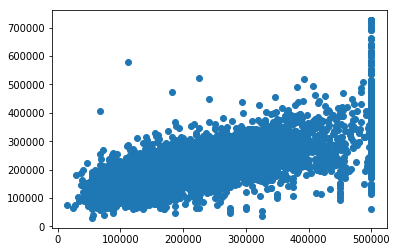

In [191]:
plt.scatter(y_test, predictions)

In [192]:
lm.predict([[8.3242, 41]])

array([[420116.43748273]])

In [193]:
lm.coef_

array([[43031.53794963,  1745.42034186]])

#### Model summary after data splitting 

In [194]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 5.470e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:22:41   Log-Likelihood:            -1.8382e+05
No. Observations:               14448   AIC:                         3.676e+05
Df Residuals:                   14446   BIC:                         3.677e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
median_income       4.201e+04    259.070    162.164      0.000    4.15e+04    4.25e+04
housing_median_age  1575.7531     35.902     43.891      0.000    1505.381    1646.125
==============================================================================
Omnibus:                     2891.710   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6582.691
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       5.393   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above code, we can see that the R^2 and adjusted R^2 have different values before and after splitting the data into training and testing samples. The R^2 and adjusted R^2 values are 0.883, which means the 88.3% of the variability has been accounted for. 

### Cross Validation

### Using 2 variables that are not highly correlated to predict the median_house_value

#### Using Training and testing split for multiple regression

In [195]:
X = df[['median_income', 'longitude']]
y = df['median_house_value']

#Split the dataframe into training and testing data
#30% of te data goes into the testing set and the rest remains in the training set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [196]:
predictions = lm.predict(X_test)
print(predictions)

[196290.00891923 221478.31810005 154641.43892748 ... 196957.086628
 127879.2869823  249628.44872655]


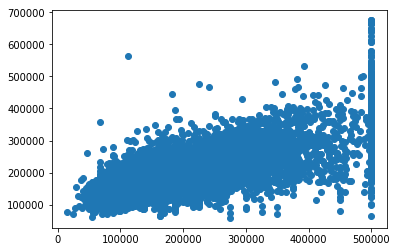

In [197]:
plt.scatter(y_test, predictions)

In [198]:
lm.coef_

array([41589.40501082, -1999.68910926])

In [199]:
lm.intercept_

-193234.2058616249

In [200]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD


In [201]:
lm.predict([[8.3252, -122.23]])

array([397427.90855916])

The above prediction is a bit skewed from the actual value, which is approximately 450000. The predictors longitude and median_income act as better predictors as compared to median_income and housing_median_age. One of the reasons why, could be that these 2 predictors are not as highly correlated to each other as the previous 2 predictors. 

In [202]:
predictions = lm.predict(X_test)
print(predictions)

[196290.00891923 221478.31810005 154641.43892748 ... 196957.086628
 127879.2869823  249628.44872655]


In [203]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 5.064e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:22:50   Log-Likelihood:            -1.8431e+05
No. Observations:               14448   AIC:                         3.686e+05
Df Residuals:                   14446   BIC:                         3.686e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
median_income  4.157e+04    364.262    114.109      0.000    4.09e+04    4.23e+04
longitude      -384.8766     13.192    -29.175      0.000    -410.735    -359.018
==============================================================================
Omnibus:                     2958.089   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6370.945
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.215   Cond. No.                         62.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

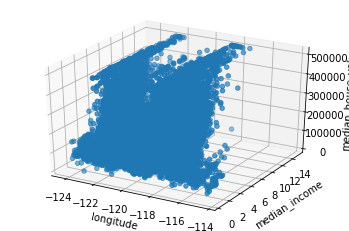

In [204]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter3D(df['longitude'],df['median_income'],df['median_house_value'],cmap='blue')
ax.set_xlabel('longitude')
ax.set_ylabel('median_income')
ax.set_zlabel('median_house_value')
plt.show()

### Cross Validation

### Multiple Regression with 3 predictors. 

In [205]:
#splitting the data into training and testing data
X = df[['latitude', 'population', 'total_bedrooms']]
y = df[['median_house_value']]

#Split the dataframe into training and testing data
#30% of te data goes into the testing set and the rest remains in the training set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [206]:

predictions = lm.predict(X_test)

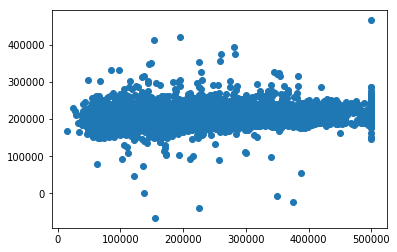

In [207]:
plt.scatter(y_test, predictions)

In [208]:
lm.coef_

array([[-8468.74572391,   -33.26187371,    90.93171302]])

In [209]:
lm.intercept_

array([507693.59276033])

In [210]:

df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD


In [211]:
lm.predict([[37.88, 322.0, 129.0]])

array([[187917.37238416]])

Bad predictor. No linear relationship

In [212]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 1.504e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:22:56   Log-Likelihood:            -1.8910e+05
No. Observations:               14448   AIC:                         3.782e+05
Df Residuals:                   14445   BIC:                         3.782e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
latitude        5547.7261     44.563    124.492      0.000    5460.377    5635.075
population       -26.9136      1.764    -15.257      0.000     -30.371     -23.456
total_bedrooms    86.1547      4.855     17.747      0.000      76.639      95.670
==============================================================================
Omnibus:                     1393.073   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1828.387
Skew:                           0.861   Prob(JB):                         0.00
Kurtosis:                       3.269   Cond. No.                         89.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Multiple Regression model 4 
Using variables that are not highly correlated, such as, total_rooms, longitude, latitude

In [213]:
#splitting the data into training and testing data
X = df[['total_rooms', 'longitude', 'latitude']]
y = df[['median_house_value']]

#Split the dataframe into training and testing data
#30% of te data goes into the testing set and the rest remains in the training set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [214]:
predictions = lm.predict(X_test)

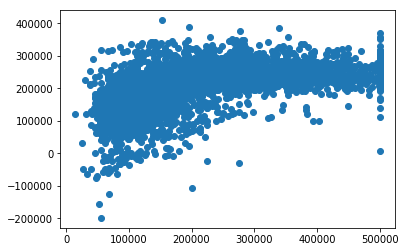

In [215]:
plt.scatter(y_test, predictions)

In [216]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.700e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:            -1.8842e+05
No. Observations:               14448   AIC:                         3.769e+05
Df Residuals:                   14445   BIC:                         3.769e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_rooms     6.5494      0.422     15.503      0.000       5.721       7.377
longitude   -6511.6735    174.347    -37.349      0.000   -6853.416   -6169.930
latitude     -1.65e+04    581.683    -28.374      0.000   -1.76e+04   -1.54e+04
==============================================================================
Omnibus:                     1919.803   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2768.511
Skew:                           1.043   Prob(JB):                         0.00
Kurtosis:                       3.501   Cond. No.                     2.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
print(lm.coef_)
print(lm.intercept_)

[[ 7.59208860e+00 -7.24618316e+04 -7.02753326e+04]]
[-5972990.341214]


In [218]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD


In [219]:
lm.predict([[880, -122.23, 37.88]])

array([[228670.7815375]])

Bad predictor. Negligible Linear relationship. 

### Cross Validation

### Multiple regression model 5

In [220]:
#splitting the data into training and testing data
X = df[['median_income','total_rooms', 'longitude', 'latitude','households']]
y = df[['median_house_value']]

#Split the dataframe into training and testing data
#30% of te data goes into the testing set and the rest remains in the training set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
predictions = lm.predict(X_test)

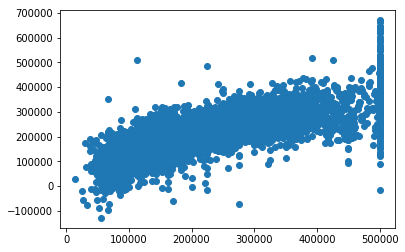

In [222]:
plt.scatter(y_test, predictions)

In [223]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                 2.213e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:23:03   Log-Likelihood:            -1.8375e+05
No. Observations:               14448   AIC:                         3.675e+05
Df Residuals:                   14443   BIC:                         3.675e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
median_income  4.496e+04    406.651    110.566      0.000    4.42e+04    4.58e+04
total_rooms     -20.5748      0.902    -22.823      0.000     -22.342     -18.808
longitude     -2649.0620    133.881    -19.787      0.000   -2911.486   -2386.638
latitude      -8168.2148    434.040    -18.819      0.000   -9018.989   -7317.441
households      123.4540      5.143     24.003      0.000     113.372     133.536
==============================================================================
Omnibus:                     2996.165   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6815.045
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       5.397   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
df.head(1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD


In [225]:
lm.predict([[8.3252, 880.0, -122.23, 37.88, 126.0]])

array([[395267.5612329]])

In [226]:
lm.score(X,y)

0.5889828156282747

#### Cross Validation

In [227]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,NEW
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,OLD
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,OLD
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,OLD


In [228]:
#creating dummy variables
df_house_age = pd.get_dummies(df['house_age'])

In [229]:
df_house_age.head(2)

,NEW,OLD
0,0,1
1,1,0


In [230]:
df = df.join(df_house_age)

In [231]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age,NEW,OLD
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD,0,1


In [232]:
df_ocean_proximity = pd.get_dummies(df['ocean_proximity'])

In [233]:
df_ocean_proximity.head(1)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0


In [234]:
df = df.join(df_ocean_proximity)
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age,NEW,OLD,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD,0,1,0,0,0,1,0


In [235]:
#multiple regression using the categorical values, binar values and the numeric values 
X = df[['population', 'households', 'median_income', 'NEW', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]
y = df[['median_house_value']]

#splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [236]:
predictions = lm.predict(X_test)

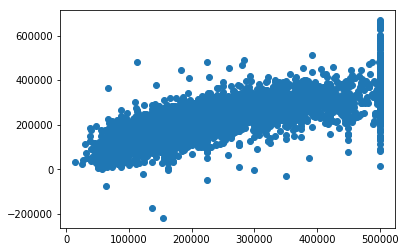

In [237]:
plt.scatter(y_test, predictions)

In [238]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.597e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:23:14   Log-Likelihood:            -1.8282e+05
No. Observations:               14448   AIC:                         3.657e+05
Df Residuals:                   14440   BIC:                         3.657e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
population      -39.2715      1.333    -29.453      0.000     -41.885     -36.658
households      159.0302      4.051     39.256      0.000     151.090     166.971
median_income  4.824e+04    237.763    202.901      0.000    4.78e+04    4.87e+04
NEW           -1.443e+04   1364.162    -10.578      0.000   -1.71e+04   -1.18e+04
INLAND        -4.249e+04   1359.054    -31.264      0.000   -4.52e+04   -3.98e+04
ISLAND         2.332e+05   3.39e+04      6.885      0.000    1.67e+05       3e+05
NEAR BAY       3.392e+04   2084.576     16.274      0.000    2.98e+04     3.8e+04
NEAR OCEAN     3.462e+04   1932.126     17.916      0.000    3.08e+04    3.84e+04
==============================================================================
Omnibus:                     2600.335   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9283.025
Skew:                           0.885   Prob(JB):                         0.00
Kurtosis:                       6.505   Cond. No.                     1.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Logistic Regression

### Logistic Regression Model 1 

In this dataset, the categorical dependent variable is house_age (NEW or OLD) or (1 or 0).
Ocean Proximity is a multi class categorical variables

In [239]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEW,OLD,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,0.037147,-0.037147,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.041674,-0.041674,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.838454,0.838454,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.307801,-0.307801,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.279494,-0.279494,0.017966,-0.006158,-0.004322,-0.019667,0.000557
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,0.243229,-0.243229,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,0.265939,-0.265939,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.102335,-0.102335,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,-0.064722,0.064722,0.256617,-0.484859,0.023416,0.160284,0.141862
NEW,0.037147,0.041674,-0.838454,0.307801,0.279494,0.243229,0.265939,0.102335,-0.064722,1.000000,-1.000000,-0.065246,0.197167,-0.009171,-0.174197,-0.013475


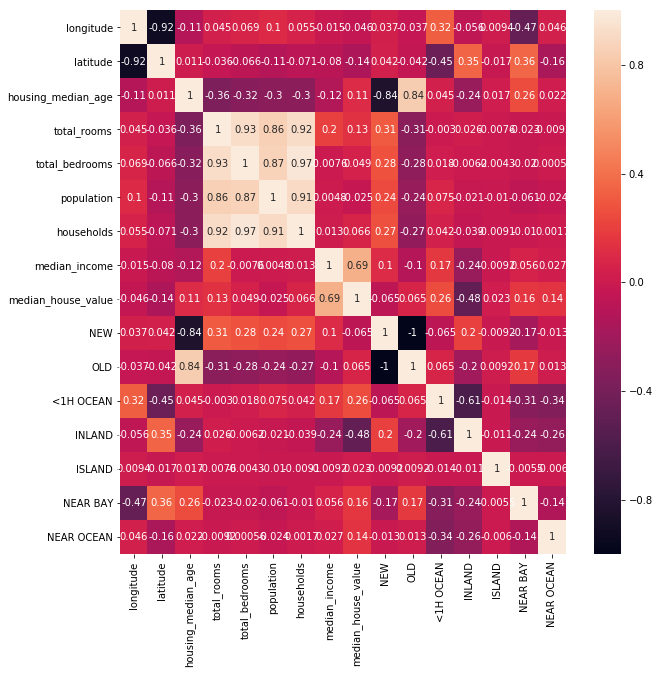

In [240]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

### using backward selection to perform logistic regression. 

In [241]:
X = df[['total_rooms', 'latitude', 'longitude', 'median_income', 'median_house_value', 'housing_median_age', 'households', 'population', 'total_bedrooms']]
y = df[['NEW']]

logm = sm.Logit(y ,X)
result = logm.fit()
print(result.summary())

C:\Users\Varada\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 19


C:\Users\Varada\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                           Logit Regression Results                           
Dep. Variable:                    NEW   No. Observations:                20640
Model:                          Logit   Df Residuals:                    20631
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                        16:23:34   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
total_rooms            0.0001      0.001      0.226      0.821      -0.001       0.001
latitude              -4.6590      0.739     -6.302      0.000      -6.108      -3.210
longitude           

C:\Users\Varada\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In the above data, we will remove all those variables whose p values are higher than 0.1.
This is done because smaller the p-value, more significant is the variable for logistic regression. It is concluded that the variable is significant and rejects the null hypothesis in favour of the alternate hypothesis. 
Thus, the variables that we will consider for prediction of the NEW variable are 
1. Latitude
2. Longitude
3. median_house_value
4. median_house_age

In [242]:

# using only the significant features for logistic regression
X = df[['latitude', 'longitude', 'median_house_value', 'housing_median_age']]
y = df[['NEW']]

# splitting the data into training and testing models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Varada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Varada\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [243]:
#predicting on test set and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [244]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3102   38]
 [  18 3034]]


The confusion matrix tells us that we have 3102+3034 correct predictions, and 38+18 incorrect predictions. 

In [245]:
logm = sm.Logit(y_train ,X_train)
result = logm.fit()
print(result.summary())

C:\Users\Varada\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Varada\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                    NEW   No. Observations:                14448
Model:                          Logit   Df Residuals:                    14444
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                        16:23:37   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
latitude              -4.0153      0.641     -6.268      0.000      -5.271      -2.760
longitude

C:\Users\Varada\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


#### Checking for multicollinearity

In [246]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,527.7,latitude
1,559.1,longitude
2,4.5,median_house_value
3,6.3,housing_median_age


According to the the VIF, there is high multicollinearity between latitude and longitude, hence, these features will be removed.

In [247]:
## running logistic regression with median_house_value and housing_median_age
X = df[['median_house_value', 'housing_median_age']]
y = df[['NEW']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg2 = linear_model.LogisticRegression()
logreg2.fit(X_train, y_train)

C:\Users\Varada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Varada\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [248]:
y_pred = logreg2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


#### Multicolinearity for the Linear Model
Here, assuming that dependent variable is the median_house_value

In [249]:
## running multiple regression
#splitting the data into training and testing data
X = df[['median_income','total_rooms', 'longitude', 'latitude', 'housing_median_age', 'population', 'households', 'total_bedrooms']]
y = df[['median_house_value']]

#Split the dataframe into training and testing data
#30% of te data goes into the testing set and the rest remains in the training set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [250]:
vif = pd.DataFrame()

In [251]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [252]:
vif.round(1)

,VIF Factor,features
0,8.0,median_income
1,29.0,total_rooms
2,614.4,longitude
3,549.0,latitude
4,7.3,housing_median_age
5,16.2,population
6,73.5,households
7,70.5,total_bedrooms


According to the Variance Inflation Factors shown above, the predictors for the median_house_value have high multicolinearity which violates the model assumptions for multple regression. Out of the predictors presents, the value for VIF Factor is the least for modeian_income and housing_median_age. By observing this, we can assume that these predictors would be the best predictors out of the others. 

When the multicollinearity is 1, the predictors are said to be independent of each other. A VIF Factor above 10 indicates that the corresponding variable must be removed since it will increase the standard error of the coefficients. 

For predicting the median_house_value, the most significant variables are housing_median_age, median_income. Below is the regression model for those 2 predictors only. 

In [253]:
#splitting the data into training and testing data
X = df[['median_income', 'housing_median_age']]
y = df[['median_house_value']]

#Split the dataframe into training and testing data
#30% of te data goes into the testing set and the rest remains in the training set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [254]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 5.470e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:23:47   Log-Likelihood:            -1.8382e+05
No. Observations:               14448   AIC:                         3.676e+05
Df Residuals:                   14446   BIC:                         3.677e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
median_income       4.201e+04    259.070    162.164      0.000    4.15e+04    4.25e+04
housing_median_age  1575.7531     35.902     43.891      0.000    1505.381    1646.125
==============================================================================
Omnibus:                     2891.710   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6582.691
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       5.393   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""